# CHAPTER - 3: CLASSIFICATION

# MNIST DATA

In [50]:
# Importing libraries needed

from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/Users/parrthhkharkar/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [52]:
X, y = mnist.data, mnist.target

In [53]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
X.shape

(70000, 784)

In [55]:
y.shape

(70000,)

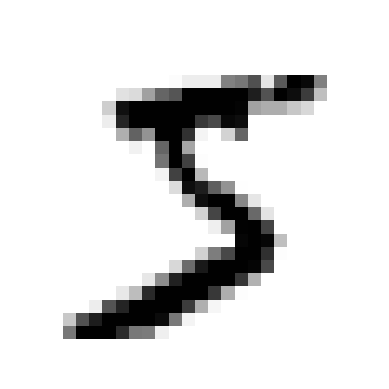

In [56]:
some_digit = X[0]
plt.imshow(some_digit.reshape(28,28))
plt.axis('off')
plt.set_cmap('binary') 

In [124]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [125]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

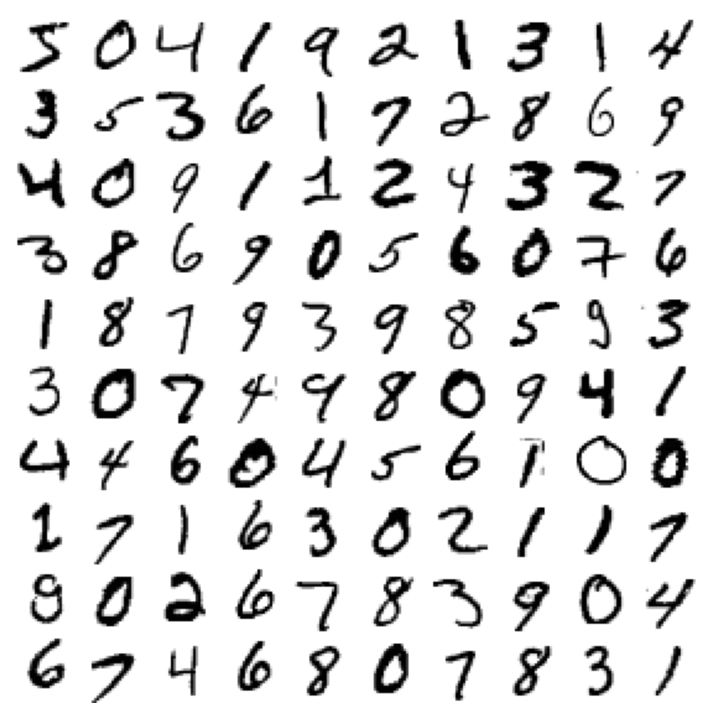

In [126]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
# save_fig("more_digits_plot")
plt.show()

In [127]:
y[0]

'5'

In [57]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### TRAINING A BINARY CLASSIFIER

In [58]:
# Training a Binary Classifier

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [59]:
sgd_clf.predict([some_digit])

array([ True])

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

#### Lets look at a dummy classifier that just classifies every single image
#### In the most frequent class, which in this case is the negative class

In [61]:


from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))
cross_val_score(dummy_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

False


array([0.90965, 0.90965, 0.90965])

#### The above result has 90% accuracy, because only about 10% of the images are 5s. So if you guess that an image is not a 5, you will be right about 90% of the time. This demonstates why accuracy is generally not the preferred performance measure, especially when we are dealing with skewed dataset. A better way to evalue the performance of a classifier is to look at the confusion matrix (CM)

#### IMPLEMENTING CROSS-VALIDATION:

In [62]:

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3)

for train_index, test_index in skfolds.split(X_train, y_train_5):

    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

0.95035
0.96035
0.9604


# CONFUSION MATRIX 

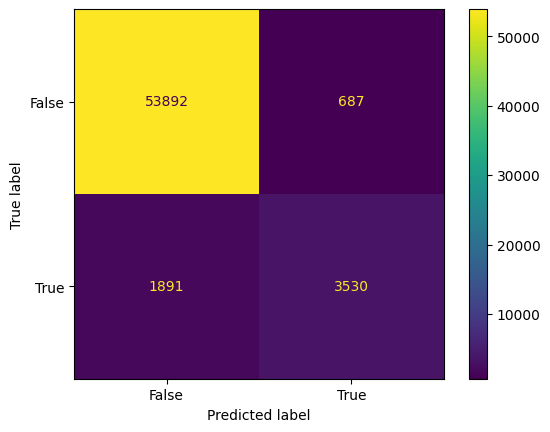

In [63]:
# To plot confusion matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
cm = confusion_matrix(y_train_5, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_clf.classes_)
disp.plot()
plt.show()

#### Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-5 images (the negative class). 53,892 of them were correctly classified as non-5s (true negatives), 687 were wrongly classified as 5s (false positives, also called type 1 errrors). The second row considers the images of 5s (the positive class), 1891 were wrongly classified as non-5s (false negatives, also called type 2 errors), 3530 wwere correctly classified as 5s (true positives). A perfect classifier would only have true positives and true negatives, So its confusion matrix would have non-zero values only on its main diagonal (top left to bottom right).


In [64]:
# A perfect Confusion matrix

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

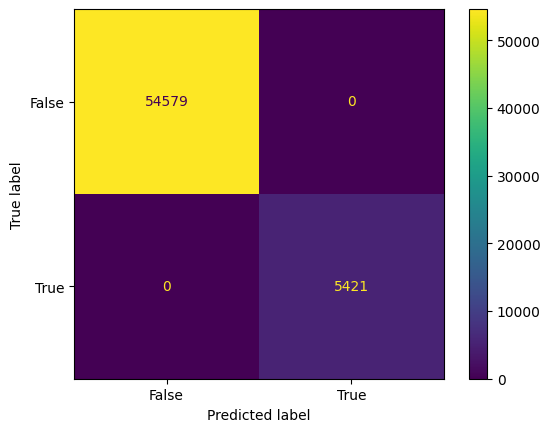

In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
cm = confusion_matrix(y_train_5, y_train_perfect_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_clf.classes_)
disp.plot()
plt.show()

# PRECISION AND RECALL

In [66]:
# PRECISION AND RECALL 

from sklearn.metrics import precision_score, recall_score

# when our model claims an image represents a 5, it is correct only 83.7% of the time
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [67]:
# Moreover, it only detects 65.1% of the 5s

recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [68]:
# To compute the F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

# PRECISION / RECALL TRADE-OFF

In [69]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [70]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [71]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [72]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

In [73]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train_5, y_scores)

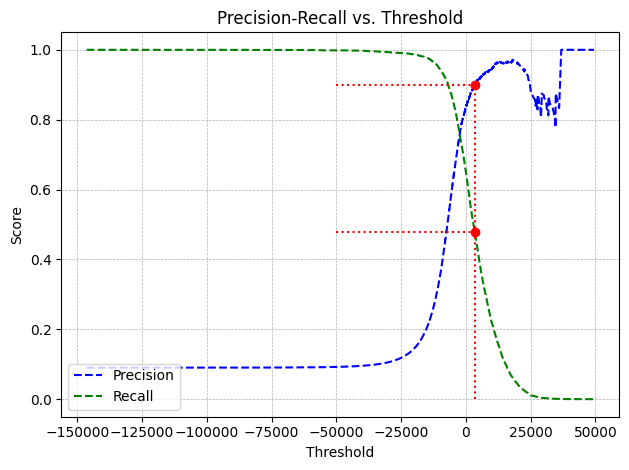

In [74]:
import matplotlib.pyplot as plt
import numpy as np

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend(loc='lower left')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.title("Precision-Recall vs. Threshold")
    plt.tight_layout()

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = threshold[np.argmax(precisions >= 0.90)]

plot_precision_recall_vs_threshold(precisions, recalls, threshold)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.show()

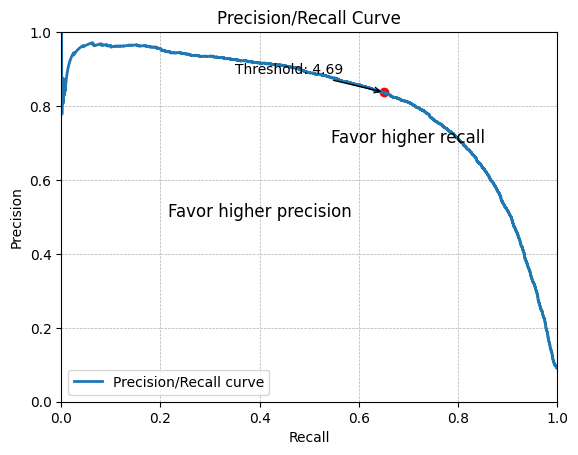

In [75]:
import matplotlib.pyplot as plt

def plot_precision_recall_curve(precisions, recalls, thresholds):
    plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(loc='lower left')
    plt.title("Precision/Recall Curve")
    threshold_idx = next(i for i, threshold in enumerate(thresholds) if threshold >= 0.5)
    plt.scatter(recalls[threshold_idx], precisions[threshold_idx], color='red', marker='o')
    plt.annotate(f'Threshold: {thresholds[threshold_idx]:.2f}',
                 xy=(recalls[threshold_idx], precisions[threshold_idx]),
                 xytext=(recalls[threshold_idx] - 0.3, precisions[threshold_idx] + 0.05),
                 arrowprops=dict(arrowstyle='->', color='black'))
    plt.text(0.4, 0.5, 'Favor higher precision', fontsize=12, ha='center')
    plt.text(0.7, 0.7, 'Favor higher recall', fontsize=12, ha='center')
    plt.xlim(0,1)
    plt.ylim(0,1)

plot_precision_recall_curve(precisions, recalls, threshold)
plt.show()



In [76]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = threshold[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439566

In [77]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [78]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# THE ROC CURVE 

In [79]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

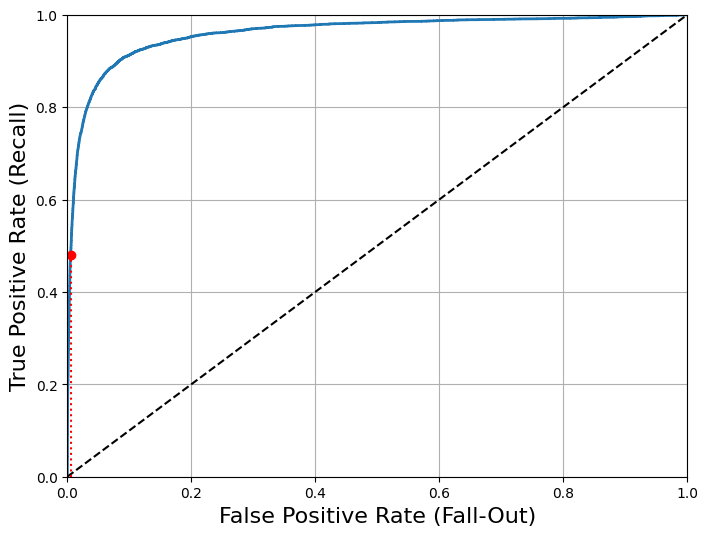

In [80]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # For dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
                                 
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [82]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [83]:
y_probas_forest[:2]



array([[0.11, 0.89],
       [0.99, 0.01]])

#### The model predicts that the first image is positive with 89% probability, and it predicts that the second image is negative with 99% probability. Since each image is either positive or negative, the probabilities in each row add up to 100%.

#### y_probas_forest is a NumPy array that contains the predicted probabilities generated by a random forest classifier for the positive class (class 1)
#### y_probas_forest[:, 1] selects the second column (index 1) of y_probas_forest, which represents the predicted probabilities of the positive class.
#### y_scores_forest is a NumPy array that contains the predicted scores generated by a random forest classifier for the positive class (class 1)

In [84]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

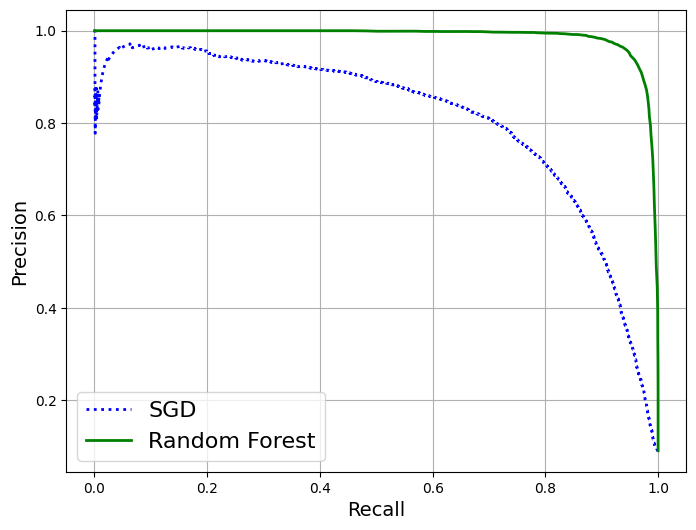

In [85]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision, recall, and thresholds for SGD classifier
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train_5, y_scores)

# Compute precision, recall, and thresholds for Random Forest classifier
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

plt.figure(figsize=(8, 6))
plt.plot(recalls_sgd, precisions_sgd, "b:", linewidth=2, label="SGD")
plt.plot(recalls_forest, precisions_forest, "g-", linewidth=2, label="Random Forest")
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.grid(True)
plt.legend(loc="lower left", fontsize=16)
plt.show()


In [86]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [87]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# MULTI CLASS CLASSFICATION

In [88]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

# Since there are 10 classes (i.e., more than 2), Scikit-Learn used the OvO strategy and trained 45 binary classifiers.

array(['5'], dtype=object)

In [89]:
some_digit_scores = svm_clf.decision_function([some_digit])

# By using the decision_function(), you will see that it returns 10 scores per instance: one per class. 
# Each class gets a score equal to the number of won duels plus or minus a small tweak (max ±0.33) to break ties

some_digit_scores

array([[ 1.80553369,  6.97231319,  2.82808315,  0.80553369,  5.91487763,
         9.29635155,  3.8357777 ,  8.02222222, -0.23224136,  4.88638088]])

In [90]:
class_id = np.argmax(some_digit_scores)

# The resultant class will be the represents to be the class itself.

In [91]:
svm_clf.classes_
svm_clf.classes_[class_id]


'5'

In [92]:
from sklearn .multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [93]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [94]:
len(ovr_clf.estimators_)

10

In [95]:
# Training an SGDClassifier on a multiclass dataset and using it to make predictions
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [96]:
sgd_clf.decision_function([some_digit]).round()

# The classifier is not very confident about its prediction 

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [97]:
# Using the cross_val_score() function to evaluate the model:

cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy" )

array([0.87365, 0.85835, 0.8689 ])

In [98]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# ERROR ANALYSIS

In [99]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

#### Most images are on the main diagonal, which means they are classified correctly

#### It is important to normalize the confusion matrix by dividing each value by the total number of images in the corresponding (true) class (i.e. divide by the rows sum)

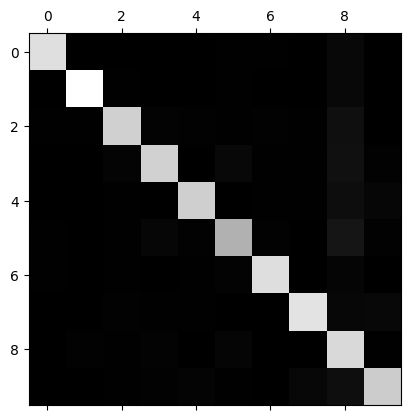

In [102]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

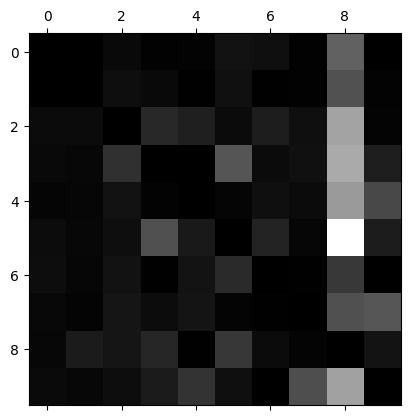

In [104]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()


# MULTI LABEL CLASSIFICATION 

In [135]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train = y_train.astype(int)
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [136]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [137]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

# MULTIOUTPUT CLASSIFICATION 

In [138]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

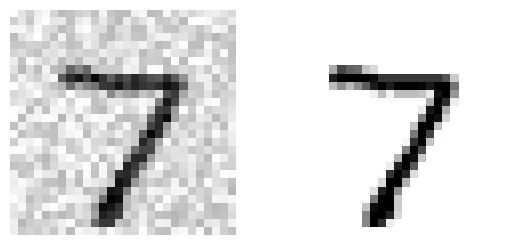

In [140]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

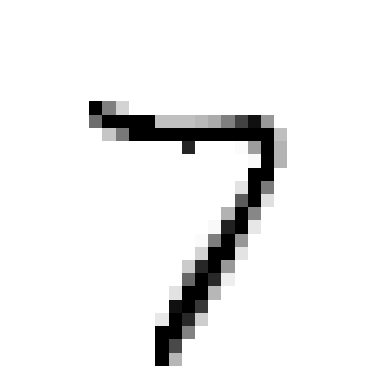

In [141]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)